# 2nd Code

In [22]:
import pandas as pd

file_path = 'gender_submission.csv'
data = pd.read_csv(file_path)
first_rows = data.head()
dimensions = data.shape
print(first_rows, dimensions, sep="\n")

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
(418, 2)


In [23]:
data_types = data.dtypes
print(data_types)

PassengerId    int64
Survived       int64
dtype: object


In [4]:
summary_stats = data.describe()
print(summary_stats)

       PassengerId    Survived
count   418.000000  418.000000
mean   1100.500000    0.363636
std     120.810458    0.481622
min     892.000000    0.000000
25%     996.250000    0.000000
50%    1100.500000    0.000000
75%    1204.750000    1.000000
max    1309.000000    1.000000


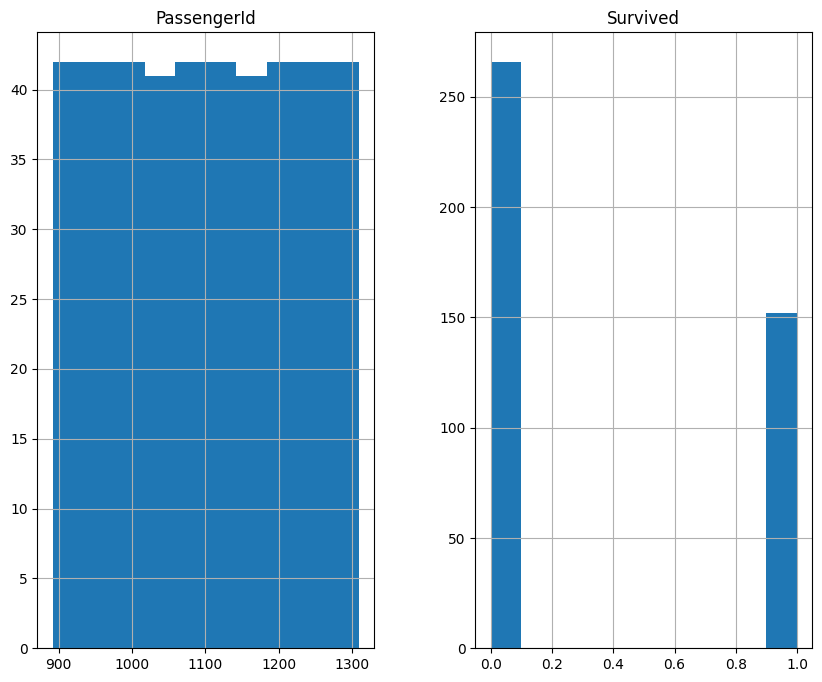

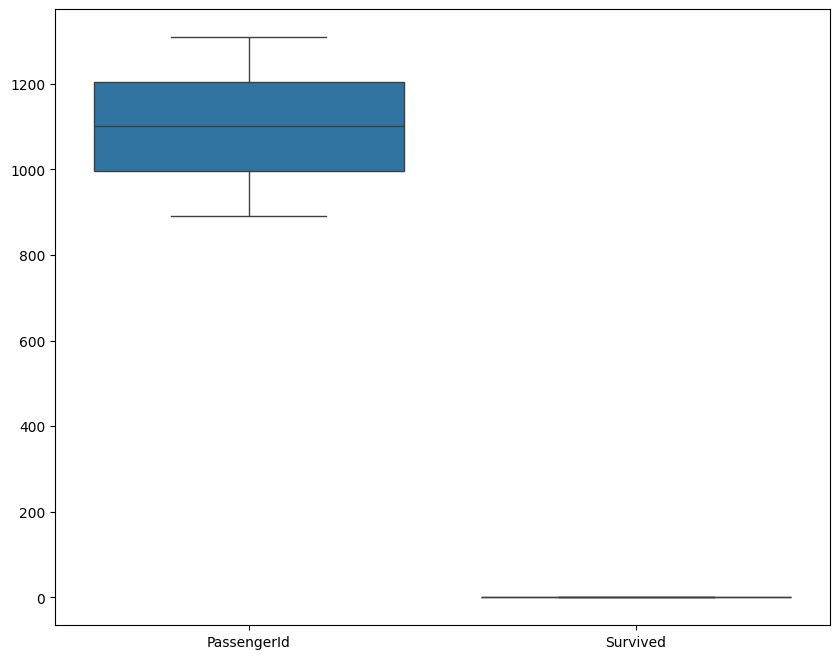

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

data.hist(figsize=(10, 8))
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(data=data)
plt.show()


In [19]:
data['Survived'] = data['Survived'].astype('category')
categorical_cols = data.select_dtypes(include=['category', 'object']).columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index(['PassengerId', 'Survived'], dtype='object')


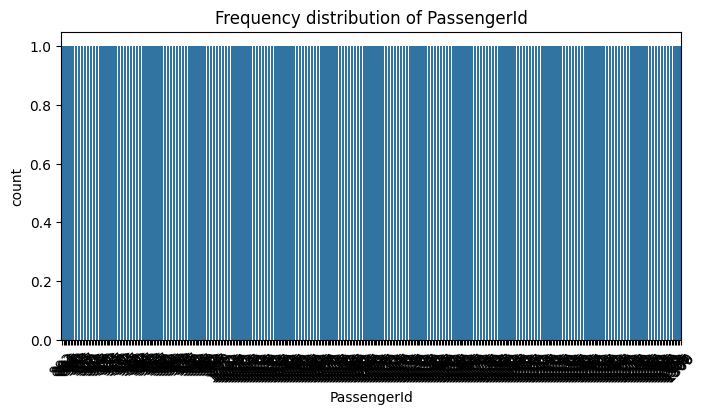

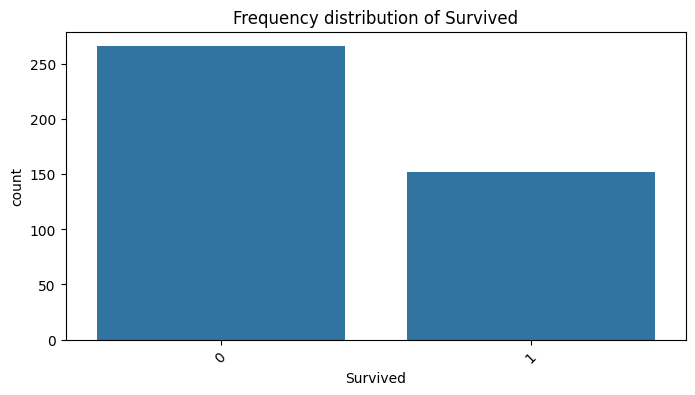

In [20]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=data)
    plt.title(f'Frequency distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


In [8]:
missing_values = data.isnull().sum()
print(missing_values)

PassengerId    0
Survived       0
dtype: int64


In [26]:
data_encoded = pd.get_dummies(data, drop_first=True)
print(data_encoded)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_encoded.select_dtypes(include=['float64', 'int64']))

scaled_data_df = pd.DataFrame(scaled_data, columns=data_encoded.select_dtypes(include=['float64', 'int64']).columns)

print(scaled_data_df)

     PassengerId  Survived
0      -1.727912 -0.755929
1      -1.719625  1.322876
2      -1.711337 -0.755929
3      -1.703050 -0.755929
4      -1.694763  1.322876
..           ...       ...
413     1.694763 -0.755929
414     1.703050  1.322876
415     1.711337 -0.755929
416     1.719625 -0.755929
417     1.727912 -0.755929

[418 rows x 2 columns]


In [13]:
from sklearn.model_selection import train_test_split

X = scaled_data_df
y = data['PassengerId']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train, X_test, y_train, y_test, sep="\n\n")

     PassengerId  Survived
336     1.056637 -0.755929
31     -1.471004 -0.755929
84     -1.031775 -0.755929
287     0.650557 -0.755929
317     0.899177 -0.755929
..           ...       ...
71     -1.139510 -0.755929
106    -0.849453 -0.755929
270     0.509672 -0.755929
348     1.156085 -0.755929
102    -0.882603 -0.755929

[334 rows x 2 columns]

     PassengerId  Survived
321     0.932327 -0.755929
324     0.957189  1.322876
388     1.487579 -0.755929
56     -1.263821 -0.755929
153    -0.459948  1.322876
..           ...       ...
57     -1.255533 -0.755929
126    -0.683706 -0.755929
24     -1.529016  1.322876
17     -1.587027 -0.755929
66     -1.180947  1.322876

[84 rows x 2 columns]

336    1228
31      923
84      976
287    1179
317    1209
       ... 
71      963
106     998
270    1162
348    1240
102     994
Name: PassengerId, Length: 334, dtype: int64

321    1213
324    1216
388    1280
56      948
153    1045
       ... 
57      949
126    1018
24      916
17      909
66   